{('I0', 'T0'): 0.2, ('I1', 'T0'): 0.2, ('I2', 'T0'): 0.2, ('I3', 'T0'): 0.2, ('I4', 'T0'): 0.2, ('I5', 'T0'): 0.2, ('I6', 'T0'): 0.2, ('I7', 'T0'): 0.2, ('I8', 'T0'): 0.2, ('I9', 'T0'): 0.2, ('I10', 'T0'): 0.2, ('I11', 'T0'): 0.2, ('I12', 'T0'): 0.2, ('I13', 'T0'): 0.2, ('I14', 'T0'): 0.2, ('I15', 'T0'): 0.2, ('I16', 'T0'): 0.2, ('I17', 'T0'): 0.2, ('I18', 'T0'): 0.2, ('I19', 'T0'): 0.2, ('I20', 'T0'): 0.2, ('I21', 'T0'): 0.2, ('I22', 'T0'): 0.2, ('I23', 'T0'): 0.2, ('I24', 'T0'): 0.2, ('I25', 'T0'): 0.2, ('I26', 'T0'): 0.2, ('I27', 'T0'): 0.2, ('I28', 'T0'): 0.2, ('I29', 'T0'): 0.2, ('I30', 'T0'): 0.2, ('I31', 'T0'): 0.2, ('I32', 'T0'): 0.2, ('I33', 'T0'): 0.2, ('I34', 'T0'): 0.2, ('I35', 'T0'): 0.2, ('I36', 'T0'): 0.2, ('I37', 'T0'): 0.2, ('I38', 'T0'): 0.2, ('I39', 'T0'): 0.2, ('I40', 'T0'): 0.2, ('I41', 'T0'): 0.2, ('I42', 'T0'): 0.2, ('I43', 'T0'): 0.2, ('I44', 'T0'): 0.2, ('I45', 'T0'): 0.2, ('I46', 'T0'): 0.2, ('I47', 'T0'): 0.2, ('I48', 'T0'): 0.2, ('I49', 'T0'): 0.2, ('I50', '

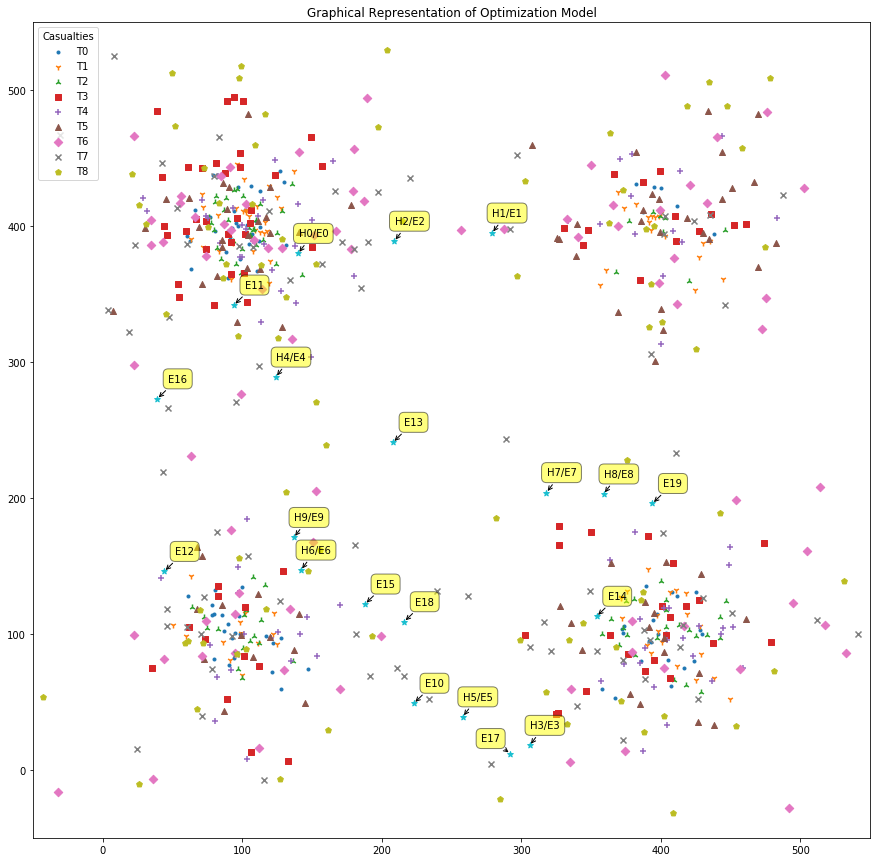

{'T0': 0.1111111111111111, 'T1': 0.1111111111111111, 'T2': 0.1111111111111111, 'T3': 0.1111111111111111, 'T4': 0.1111111111111111, 'T5': 0.1111111111111111, 'T6': 0.1111111111111111, 'T7': 0.1111111111111111, 'T8': 0.1111111111111111}
{('I0', 'J0', 'T0'): 10.417085364594044, ('I0', 'J1', 'T0'): 147.78748703781537, ('I0', 'J2', 'T0'): 77.57129380391285, ('I0', 'J3', 'T0'): 407.28521861356603, ('I0', 'J4', 'T0'): 97.29163971191318, ('I0', 'J5', 'T0'): 369.34649265384047, ('I0', 'J6', 'T0'): 239.23428556650674, ('I0', 'J7', 'T0'): 260.6000646195744, ('I0', 'J8', 'T0'): 291.98030316921995, ('I0', 'J9', 'T0'): 215.0738424575763, ('I0', 'J10', 'T0'): 349.20743338808427, ('I0', 'J11', 'T0'): 57.80592381445021, ('I0', 'J12', 'T0'): 255.45141727381596, ('I0', 'J13', 'T0'): 163.95186870232504, ('I0', 'J14', 'T0'): 352.19729277086793, ('I0', 'J15', 'T0'): 269.98413440539554, ('I0', 'J16', 'T0'): 146.0256457808093, ('I0', 'J17', 'T0'): 406.99252146712314, ('I0', 'J18', 'T0'): 289.6088129656347, ('

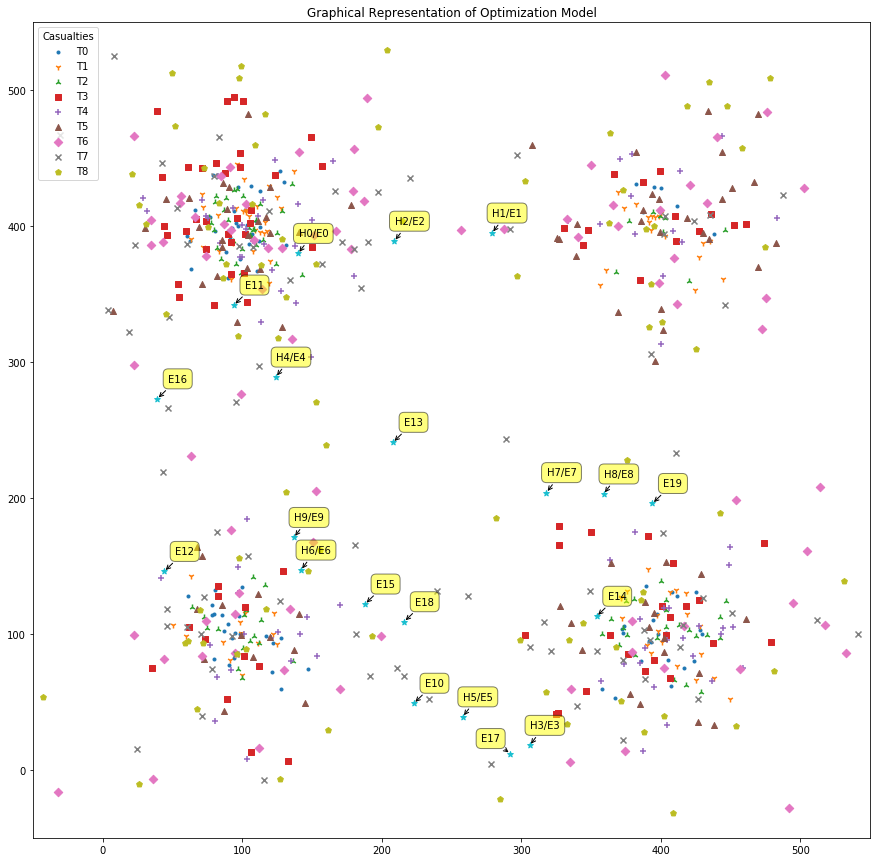

In [1]:
# TODO add relatively complete recourse!
# TODO print out solution and validate

from gurobipy import *
import numpy as np

import data_generation as Data
num_scenarios = Data.num_scenarios
num_locations = Data.num_locations
# Build Sets
T = ['T'+ str(num) for num in list(range(0,num_scenarios))]
I = ['I'+ str(num) for num in list(range(0,num_locations))]
J = ['J'+ str(num) for num in list(range(0,20))]
K = ['K'+ str(num) for num in list(range(0,10))]
L = Data.Lset
M = Data.Mset

a = Data.a_it  # injury severity (i,t)
b = Data.b_ijt  # distance injury to evac (i,j,t)
c = Data.c_ikt  # distance injury to hospital (i,k,t)
d = Data.d_jkmt  # speed (j,k,m,t)
e = Data.e_it  # total people injured (i,t)
f = Data.f_lt  # number patient bed req (l,t)
ecap = Data.ecap_mt  # m transport capacity (m,t)
hcap = Data.hcap_lt  # hospital bed type capacity (l,t)
enod = Data.enod  # evac capacity (j,t)
hnod = Data.hnod  # hospital capacity (k,t)
u = Data.u  # max num hospital sites to open
v = Data.v  # max num evac sites to open
wx = Data.wx_scen  # proportion ground evac req (t)
#wx = Data.wx_it
p = Data.p_t  # probability of each scenario

#print(T)
#print(I)
#print(J)
#print(K)
#print(L)
#print(M)
Data.plot_map()

#print(p)
#print(b)
#print(c)
#print(d)
#print(e)
#print(a)
#print(f)
#print(ecap)
#print(hcap)

In [2]:
def ModifyAndSolveSP(t):
    #Remove any for t in T
    #Modify objective coefficients
    expr = LinExpr()
    for i in I:
        for j in J:
            for k in K:
                for l in L:
                    for m in M:
                        expr.add(x[i,j,k,l,m], a[i,t] * ((b[i,j,t] + c[i,k,t]) / d[j,k,m,t]))
          
    SP.setObjective(expr, GRB.MINIMIZE)

    # Modify constraint rhs
    for i in I:
        EvacAllConstrs[i].rhs = e[i,t]
    
    for m in M:
        CapEvacConstrs[m].rhs = ecap[m,t]
            
    for l in L:
        CapHospitalConstrs[l].rhs = hcap[l,t]
            
    for j in J:
        CapEvacFlowConstrs[j].rhs = enod * ysol[j]
    
    for k in K:
        CapHospitalFlowConstrs[k].rhs = hnod * zsol[k]
    
    #Can't re-use constraint since RHS must be real value/constant but x.sum('*','*','*','*','*') isn't
    SP.remove(SP.getConstrByName("GroundTransportProportion"))
    GroundTransportProportionConstr[0] = SP.addConstr((x.sum('*', '*', '*', '*', 'G') >= wx[t] * x.sum('*','*','*','*','*')),'GroundTransportProportion')
    
    for l in L:
        PatientTypeConstrs[l].rhs = f[l,t]
    
    # Solve and get the DUAL solution
    SP.update()
    SP.optimize()
    pi_sol = {}
    gamma_sol = {} 
    alpha_sol = {}
    lambda_sol = {}
    delta_sol = {}
    sigma_sol = {}
    psi_sol =  {}
    
    for i in I:
        pi_sol[i] = EvacAllConstrs[i].Pi
            
    for m in M:
        gamma_sol[m] = CapEvacConstrs[m].Pi
    
    for l in L:
        alpha_sol[l] = CapHospitalConstrs[l].Pi
    
    for j in J:
        lambda_sol[j] = CapEvacFlowConstrs[j].Pi
    
    for k in K:
        delta_sol[k] = CapHospitalFlowConstrs[k].Pi
    
    sigma_sol = GroundTransportProportionConstr[0].Pi
    
    for l in L:
        psi_sol[l] = PatientTypeConstrs[l].Pi
    
    SPobj = SP.objVal
    
    # Check whether a violated Benders cut is found
    CutFound_SP = False
    if(nsol[t] < SPobj - CutViolationTolerance): # Found Benders cut is violated at the current master solution
        CutFound_SP = True
    #SP.write("out.lp")
    return SPobj, CutFound_SP, pi_sol, gamma_sol, alpha_sol, lambda_sol, delta_sol, sigma_sol, psi_sol

In [3]:
# Build the master problem
MP = Model("MP")
MP.Params.outputFlag = 0  # turn off output
MP.Params.method = -1      # -1 is automatic, 1 - dual simplex

# First-stage decision variables
y = MP.addVars(J, vtype=GRB.BINARY, name='y')  # select evac site
z = MP.addVars(K, vtype=GRB.BINARY, name='z')  # select hospital site

# Second-stage eta
n = MP.addVars(T,obj=p, name='n')
MP.modelSense = GRB.MINIMIZE

#First-stage decision variable constraints
MP.addConstr((y.sum('*') == v), name='CapEvacSites')
MP.addConstr((z.sum('*') == u), name='CapHospitalSites')

MP.update()

Academic license - for non-commercial use only


In [4]:
# Build the sub-problems
SP = Model("SP")
# Removed p[t]
# Second stage decision variables, will change objective coefficients for each scenario, t
x = SP.addVars(I, J, K, L, M, obj=1, name='x')

EvacAllConstrs = {}
CapEvacConstrs = {}
CapHospitalConstrs = {}
CapEvacFlowConstrs = {}
CapHospitalFlowConstrs = {}
GroundTransportProportionConstr = {}
PatientTypeConstrs = {}


# Setting RHS of these constraints inside Bender's loop later, so for now initialize them using 0
# RHS changes based on scenario t or based on first stage candidate solutions y and z
for i in I:
    EvacAllConstrs[i] = SP.addConstr((x.sum(i, '*', '*', '*', '*') == 0),'EvacAll'+str(i))

for m in M:
    CapEvacConstrs[m] = SP.addConstr((x.sum('*', '*', '*', '*', m) <= 0),'CapEvac'+str(m))

for l in L:
    CapHospitalConstrs[l] = SP.addConstr((x.sum('*', '*', '*', l, '*') <= 0),'CapHospital'+str(l))

for j in J:
    CapEvacFlowConstrs[j] = SP.addConstr((x.sum('*', j, '*', '*', '*') <= 0),'CapEvacFlow'+str(j))
        
for k in K:
    CapHospitalFlowConstrs[k] = SP.addConstr((x.sum('*', '*', k, '*', '*') <= 0),'CapHospitalFlow'+str(k))


GroundTransportProportionConstr[0] = SP.addConstr((x.sum('*', '*', '*', '*', 'G')
                                                   >=0),'GroundTransportProportion')
    
for l in L:
    PatientTypeConstrs[l] = SP.addConstr((x.sum('*', '*', '*', l, '*') == 0),'PatientType'+str(l))

SP.modelSense = GRB.MINIMIZE
SP.update()
SP.Params.outputFlag = 0 # turn off output

In [ ]:
%%time
# Bender's Loop
CutViolationTolerance = 0.0001
CutFound = True
NoIters = 0
NoCuts = 0
BestUB = GRB.INFINITY
while(CutFound and NoIters < 1000):
    NoIters += 1
    CutFound = False
    
    # Solve MP, get new candidate y, z, and eta(n)
    MP.update()
    MP.optimize()     

    MPobj = MP.objVal # Get MP solution
    #print('MPobj: %g' % MPobj)
    
    ysol = {}
    for j in J:
        ysol[j] = y[j].x
        
    zsol = {}
    for k in K:
        zsol[k] = z[k].x
    
    nsol = {}
    for t in T:
        nsol[t] = n[t].x
        
    UB = 0 #First stage costs are always 0
    for t in T:
        # Instead of 1 million, intelligently choose enod and hnod for Big M constraints
        # Smaller enod and hnod for each scenario,t  as sum(e_it) over all injury locations, i
        enod = sum(e[i,t] for i in I)
        hnod = enod
        Qvalue, CutFound_t,  pi_sol, gamma_sol, alpha_sol, lambda_sol, delta_sol, sigma_sol, psi_sol  = ModifyAndSolveSP(t)
        UB += p[t] * Qvalue
        if(CutFound_t):
            NoCuts +=1
            CutFound = True
            #Dual has 7 variables corresponding to the 7 Primal constraints
            #RHS of Primal constraints become coefficients of Dual Objective
            expr = LinExpr(n[t] - quicksum(e[i,t]*pi_sol[i] for i in I)
                                - quicksum(ecap[m,t]*gamma_sol[m] for m in M)
                                - quicksum(hcap[l,t]*alpha_sol[l] for l in L)
                                - quicksum(enod * y[j]*lambda_sol[j] for j in J)
                                - quicksum(hnod * z[k]*delta_sol[k] for k in K)
                                #- wx[t] * sigma_sol
                                - quicksum(f[l,t]*psi_sol[l] for l in L))
            MP.addConstr(expr >= 0)
    
    if(UB < BestUB):
        BestUB = UB
    print("**" + str(NoIters)+"**")
    print("LB: " + str(MPobj) + "\n")
    print("UB: " + str(UB) + "\n")
    print("Best UB: " + str(BestUB) + "\n")
    
print('\nOptimal Solution:')
print('MPobj: %g' % MPobj)
print("NoIters: " + str(NoIters))
print("NoCuts: " + str(NoCuts))

**1**
LB: 0.0

UB: 484.4828117379225

Best UB: 484.4828117379225

**2**
LB: 0.0

UB: 586.2458915313532

Best UB: 484.4828117379225

**3**
LB: 0.0

UB: 475.59814248287057

Best UB: 475.59814248287057

**4**
LB: 0.0

UB: 498.84969819926306

Best UB: 475.59814248287057

**5**
LB: 0.0

UB: 460.34673363198556

Best UB: 460.34673363198556

**6**
LB: 0.0

UB: 464.6117661982619

Best UB: 460.34673363198556

**7**
LB: 0.0

UB: 435.10582454917716

Best UB: 435.10582454917716

**8**
LB: 0.0

UB: 449.5721390385468

Best UB: 435.10582454917716

**9**
LB: 0.0

UB: 469.46051449276507

Best UB: 435.10582454917716

**10**
LB: 0.0

UB: 416.99862250084016

Best UB: 416.99862250084016

**11**
LB: 0.0

UB: 462.72434024001905

Best UB: 416.99862250084016

**12**
LB: 0.0

UB: 405.83095023523146

Best UB: 405.83095023523146

**13**
LB: 14.459855598232398

UB: 391.9034495055399

Best UB: 391.9034495055399

**14**
LB: 68.43785255463158

UB: 500.94314068055087

Best UB: 391.9034495055399

**15**
LB: 68.437852554

**103**
LB: 168.63347601092556

UB: 431.79844078396536

Best UB: 386.28683139418627

**104**
LB: 168.96703091351867

UB: 434.7538516460812

Best UB: 386.28683139418627

**105**
LB: 169.49207063058282

UB: 484.0867950748757

Best UB: 386.28683139418627

**106**
LB: 169.6164608587373

UB: 430.93557682547095

Best UB: 386.28683139418627

**107**
LB: 169.62244344433864

UB: 434.94978001857123

Best UB: 386.28683139418627

**108**
LB: 169.96743637157024

UB: 427.10927649238886

Best UB: 386.28683139418627

**109**
LB: 170.0893603210074

UB: 416.58492876219407

Best UB: 386.28683139418627

**110**
LB: 170.22890972755087

UB: 420.4162284817465

Best UB: 386.28683139418627

**111**
LB: 170.4020028947374

UB: 473.9814656700374

Best UB: 386.28683139418627

**112**
LB: 171.0592616265236

UB: 446.1716063215384

Best UB: 386.28683139418627

**113**
LB: 171.30053059738316

UB: 394.68896765691613

Best UB: 386.28683139418627

**114**
LB: 171.49319324619228

UB: 490.3137437023481

Best UB: 386.286831

In [ ]:
print('SOLUTION:')
for j in J:
    if y[j].x > 0.99:
        print(y[j].VarName + str(y[j].x))
for k in K:
    if z[k].x > 0.99:
        print(z[k].VarName + str(z[k].x))

In [ ]:
for i in I:
    for j in J:
        for k in K:
            for l in L:
                for m in M:
                    for t in T:
                        if x[i,j,k,l,m,t].x > 0.0:
                            print(x[i,j,k,l,m,t].VarName + str(x[i,j,k,l,m,t].x))

In [ ]:
val = x['I1','J1','K1','MCW','G','T1'].x
if val > -1:
    print(val)
    #print(x['I1','J1','K1','MCW','G','T1'].x)